In [2]:
!pip install opencv-python

In [3]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos',origin = dataset_url, cache_dir='.', untar=True)

In [4]:
data_dir

'.\\datasets\\flower_photos'

In [5]:
import pathlib 

In [6]:
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [7]:
image_count= len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [8]:
roses = (list(data_dir.glob('roses/*')))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

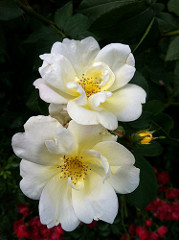

In [9]:
PIL.Image.open(str(roses[0]))

In [10]:
len(roses)

641

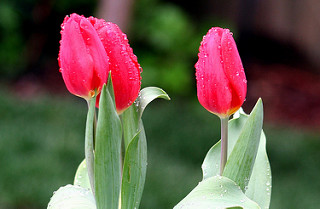

In [11]:
Tulips = (list(data_dir.glob('Tulips/*')))
PIL.Image.open(str(Tulips[0]))

In [12]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [13]:
flowers_images_dict['daisy']

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [14]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [15]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [16]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

img
# Convert image to numpy array

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [17]:
img.shape

(240, 179, 3)

In [18]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [19]:
x = [] 
y = []
for flower_name,images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_image = cv2.resize(img,(180,180))
        x.append(resized_image)
        y.append(flowers_labels_dict[flower_name])


In [20]:
y[:5]

[0, 0, 0, 0, 0]

In [21]:
x[0]  # 3d array 1st is for x second for y and third for rgb channel

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [22]:
x = np.array(x)
y = np.array(y)


In [23]:
x

array([[[[  1,  16,   7],
         [  1,  16,   7],
         [  1,  17,   9],
         ...,
         [ 23,  50,  31],
         [ 25,  51,  32],
         [ 26,  52,  33]],

        [[ 10,  23,  15],
         [ 10,  23,  15],
         [  9,  22,  14],
         ...,
         [ 20,  44,  30],
         [ 23,  47,  33],
         [ 26,  50,  36]],

        [[ 13,  20,  13],
         [ 12,  20,  13],
         [ 11,  19,  12],
         ...,
         [ 21,  43,  30],
         [ 22,  45,  31],
         [ 25,  48,  34]],

        ...,

        [[ 12,  24,  18],
         [ 11,  22,  15],
         [ 12,  21,  11],
         ...,
         [  7,  14,   7],
         [  2,   8,   2],
         [  0,   2,   0]],

        [[ 19,  30,  28],
         [ 16,  26,  21],
         [ 14,  22,  15],
         ...,
         [  3,  12,   2],
         [  0,   8,   1],
         [  0,   6,   1]],

        [[ 11,  21,  20],
         [ 17,  25,  24],
         [ 21,  28,  23],
         ...,
         [  1,  12,   2],
        

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [25]:
len(x_train)

2752

In [26]:
len(x_test)

918

In [27]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [28]:
x_train_scaled

array([[[[0.26666667, 0.30980392, 0.30196078],
         [0.24705882, 0.2745098 , 0.24705882],
         [0.23529412, 0.24313725, 0.21960784],
         ...,
         [0.19215686, 0.15686275, 0.14509804],
         [0.18823529, 0.15294118, 0.14117647],
         [0.18823529, 0.15294118, 0.14117647]],

        [[0.22352941, 0.24313725, 0.23529412],
         [0.23921569, 0.25098039, 0.23529412],
         [0.23529412, 0.23921569, 0.21568627],
         ...,
         [0.18823529, 0.15294118, 0.14117647],
         [0.18823529, 0.15294118, 0.14117647],
         [0.19607843, 0.16078431, 0.14901961]],

        [[0.23921569, 0.22745098, 0.22352941],
         [0.25098039, 0.25098039, 0.23137255],
         [0.23137255, 0.23137255, 0.20784314],
         ...,
         [0.19215686, 0.15686275, 0.14509804],
         [0.19215686, 0.15686275, 0.14509804],
         [0.19607843, 0.16078431, 0.14901961]],

        ...,

        [[0.19215686, 0.4745098 , 0.36470588],
         [0.15686275, 0.25490196, 0.2       ]

In [29]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(x_train_scaled, y_train, epochs=30)              

Epoch 1/30
86/86 [==============================] - 35s 403ms/step - loss: 1.3224 - accuracy: 0.4306
Epoch 2/30
86/86 [==============================] - 36s 419ms/step - loss: 1.0233 - accuracy: 0.5872
Epoch 3/30
86/86 [==============================] - 35s 406ms/step - loss: 0.8451 - accuracy: 0.6715
Epoch 4/30
86/86 [==============================] - 36s 422ms/step - loss: 0.6269 - accuracy: 0.7678
Epoch 5/30
86/86 [==============================] - 37s 430ms/step - loss: 0.4431 - accuracy: 0.8368
Epoch 6/30
86/86 [==============================] - 37s 434ms/step - loss: 0.2495 - accuracy: 0.9132
Epoch 7/30
86/86 [==============================] - 36s 420ms/step - loss: 0.1457 - accuracy: 0.9575
Epoch 8/30
86/86 [==============================] - 35s 409ms/step - loss: 0.0662 - accuracy: 0.9844
Epoch 9/30
86/86 [==============================] - 35s 408ms/step - loss: 0.0456 - accuracy: 0.9873
Epoch 10/30
86/86 [==============================] - 36s 419ms/step - loss: 0.0219 - accura

In [30]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 3s 90ms/step - loss: 2.2499 - accuracy: 0.6394


[2.2499282360076904, 0.6394335627555847]

Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting

In [32]:
predictions = model.predict(x_test_scaled)
predictions

array([[  3.385555  ,  15.158805  ,  -8.718671  , -16.168352  ,
        -11.271131  ],
       [  9.955616  ,   1.1802737 , -13.21133   ,  -3.8925507 ,
          2.1598113 ],
       [ -5.6745334 ,  -2.9841459 ,  10.441146  , -12.691397  ,
         -2.6019971 ],
       ...,
       [ -1.0493071 ,  -8.370371  , -11.999471  ,   4.259375  ,
          6.622983  ],
       [  4.7496    ,  -4.307231  ,  -2.1044629 ,  -7.8674984 ,
         -3.3676214 ],
       [ -0.22444782, -11.4214    ,  -2.3734348 ,   2.3829827 ,
          2.1560326 ]], dtype=float32)

In [34]:
score = tf.nn.softmax(predictions[0])  # To convert y_test to probability score 
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([7.7079567e-06, 9.9999225e-01, 4.2671772e-11, 2.4819075e-14,
       3.3236977e-12], dtype=float32)>

In [35]:
np.argmax(score)

1

In [36]:
y_test[0]

1

In [37]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomRotation(0.9),
    
])

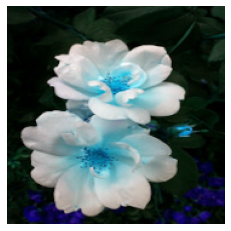

In [38]:
plt.axis('off')
plt.imshow(x[0])

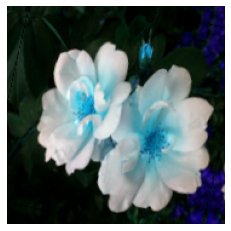

In [39]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype('uint8'))

In [40]:
data_Augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal"), 
                                                 
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ])


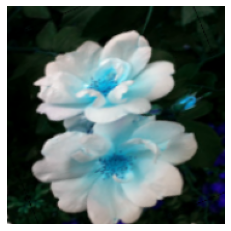

In [41]:
plt.axis('off')
plt.imshow(data_Augmentation(x)[0].numpy().astype("uint8"))

In [42]:
num_classes = 5

model = Sequential([
  data_Augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(x_train_scaled, y_train, epochs=30)    

Epoch 1/30
86/86 [==============================] - 43s 496ms/step - loss: 1.3507 - accuracy: 0.4106
Epoch 2/30
86/86 [==============================] - 42s 492ms/step - loss: 1.0659 - accuracy: 0.5730
Epoch 3/30
86/86 [==============================] - 43s 500ms/step - loss: 0.9724 - accuracy: 0.6250
Epoch 4/30
86/86 [==============================] - 43s 495ms/step - loss: 0.9010 - accuracy: 0.6533
Epoch 5/30
86/86 [==============================] - 42s 494ms/step - loss: 0.8462 - accuracy: 0.6857
Epoch 6/30
86/86 [==============================] - 44s 514ms/step - loss: 0.7893 - accuracy: 0.6988
Epoch 7/30
86/86 [==============================] - 43s 502ms/step - loss: 0.7807 - accuracy: 0.6984
Epoch 8/30
86/86 [==============================] - 43s 501ms/step - loss: 0.7227 - accuracy: 0.7246
Epoch 9/30
86/86 [==============================] - 43s 498ms/step - loss: 0.7047 - accuracy: 0.7376
Epoch 10/30
86/86 [==============================] - 43s 498ms/step - loss: 0.6770 - accura

In [44]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 3s 111ms/step - loss: 0.8804 - accuracy: 0.7397


[0.8804065585136414, 0.7396514415740967]